In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
from pyr_flow.utils.evaluation_utils import *
import importlib

#importlib.reload(pyr_flow.utils.evaluation_utils)


from matplotlib import pyplot as plt
%matplotlib inline


sns.set_style('whitegrid')

In [2]:
COMPLETE_NLL = 0
TOP_NLL = 1

In [4]:
# Load Model
model_path = f'../{STATE_DIR}CIFAR_use/14 - loss - 10.88870.model'
results = load_eval_data(model_path)

##########################################################################

Creating Pyramid Flow Network
Channel Shifter - Shift 27 by 3
Conv Bundle 8 - Size: 9 total_pixel_depth: 27 internal_pixel_depth: 3 jump_over_pixels :True |param count: 2457.0
S-Log Gate
Cut Off - Remaining Depth 13
Combine Neighbors - 2x2
Channel Shifter - Shift 52 by 13
Conv Bundle 9 - Size: 4 total_pixel_depth: 52 internal_pixel_depth: 13 jump_over_pixels :True |param count: 4342.0
S-Log Gate
Cut Off - Remaining Depth 26
Combine Neighbors - 2x2
Channel Shifter - Shift 104 by 26
Conv Bundle 10 - Size: 4 total_pixel_depth: 104 internal_pixel_depth: 26 jump_over_pixels :True |param count: 17134.0
S-Log Gate
Cut Off - Remaining Depth 52
Combine Neighbors - 2x2
####Last Pixel Stuff:
Channel Shifter - Shift 208 by 104
Conv Bundle 11 - Size: 2 total_pixel_depth: 208 internal_pixel_depth: 104 jump_over_pixels :True |param count: 38220.0
S-Log Gate
Cut Off - Remaining Depth 69
Channel Shifter - Shift 69 by 34
Conv Bu

C:\Mega\trunk\pyramidic-normalizing-flow\pyr_flow\misc\misc.py:25: UserWarning: There need to be as many waste_steps need to align with pyramid_steps
  warnings.warn(text)


In [12]:
results[EvaluatedDatasets.CIFAR_TRAIN][TOP_NLL].max()

152.43703

In [42]:
def filter_threshold(llarray, threshold):
    print(np.sum(llarray < threshold)/len(llarray)*100, "inliers")
    return llarray[llarray < threshold]

def plot_mean(set):
    mean = set.mean()
    plt.vlines(mean)

def plot_all(idx, threshold):
    c_train = results[EvaluatedDatasets.CIFAR_TRAIN][idx]
    c_test = results[EvaluatedDatasets.CIFAR_TEST][idx]
    svhn = results[EvaluatedDatasets.SVHN][idx]

    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)


    sns.distplot(filter_threshold(c_train, threshold), label=f"Cifar Test {c_test.mean():.3f}", color='r', ax=ax)
    sns.distplot(filter_threshold(c_test, threshold), label=f"Cifar Train {c_train.mean():.3f}", color='g', ax=ax)
    sns.distplot(filter_threshold(svhn, threshold), label=f"SVHN {svhn.mean():.3f}", color='b', ax=ax)

    plt.axvline(c_train.mean(), color='r')
    plt.axvline(c_test.mean(), color='g')
    plt.axvline(svhn.mean(), color='b')

    # plt.xticks(np.linspace(-11000, 0, 5), fontsize=16)
    #plt.yticks(np.linspace(0., 0.0006, 5), fontsize=13)
    plt.legend(fontsize=13)

Top NLL
99.37234042553192 inliers
99.44285714285715 inliers
99.93167940561082 inliers


C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

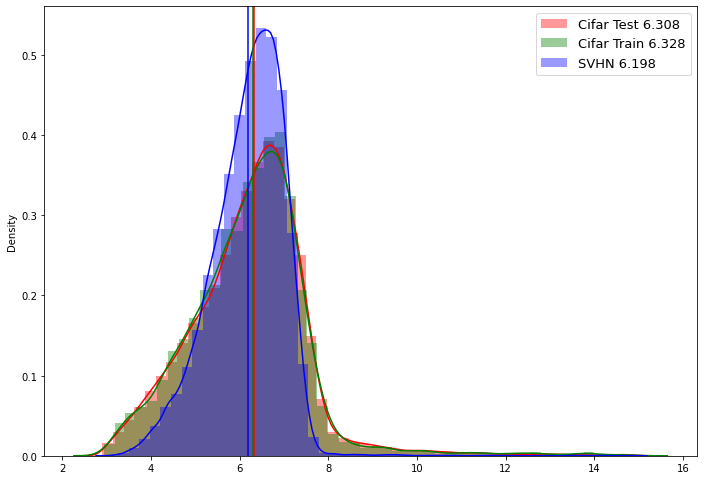

In [45]:
print("Top NLL")
plot_all(TOP_NLL, threshold = 15)

Complete NLL
81.48085106382979 inliers
81.31428571428572 inliers
96.42313221458359 inliers


C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

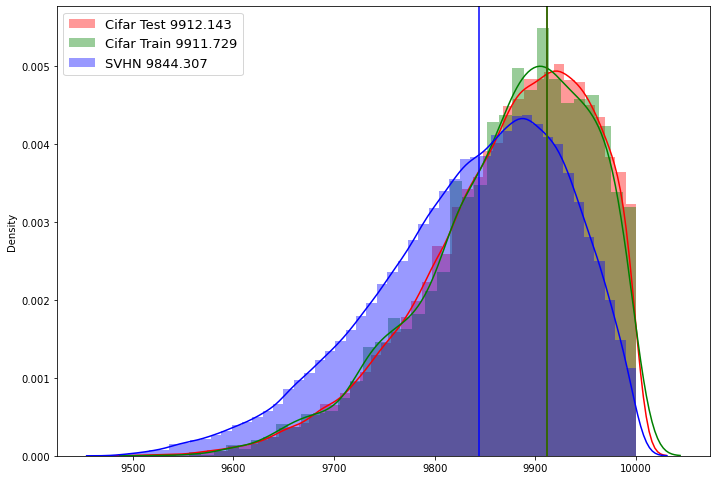

In [44]:
print("Complete NLL")
plot_all(COMPLETE_NLL, threshold = 10000)


In [19]:
a = filter_threshold(results[EvaluatedDatasets.CIFAR_TRAIN][COMPLETE_NLL], 10000)
print(len(a))

38296 outliers 47000
38296
